In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("Startups in 2021 end.csv")
data.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


# to get a new coloum with the year in it 

In [7]:
data["Year Joined"] = pd.to_datetime(data["Date Joined"]).dt.year
data["Month Joined"] = pd.to_datetime(data["Date Joined"]).dt.month_name()
data.head(1)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year Joined,Month Joined
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,April


In [8]:
data["Valuation ($B)"] = data["Valuation ($B)"].replace({"\\$": ""}, regex=True).astype(float)
data.head(9)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year Joined,Month Joined
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2017,April
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012,December
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2014,January
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011,December
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2018,January
5,5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2014,December
6,6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2019,February
7,7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2018,April
8,8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"Sequoia Capital, Redpoint e.ventures, Kaszek V...",2018,March


# Changing the incorrect and mismatch names from the data

In [9]:
data.replace({
    'Artificial intelligence':'Artificial Intelligence',
    'Finttech':'Fintech',
    'United States,':'United States',
    'Indonesia,':'Indonesia',
    'Bangalore':'Bengaluru',
    'Gurgaon':'Gurugram'
    
},inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        936 non-null    int64  
 1   Company           936 non-null    object 
 2   Valuation ($B)    936 non-null    float64
 3   Date Joined       936 non-null    object 
 4   Country           936 non-null    object 
 5   City              921 non-null    object 
 6   Industry          936 non-null    object 
 7   Select Investors  935 non-null    object 
 8   Year Joined       936 non-null    int32  
 9   Month Joined      936 non-null    object 
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 69.6+ KB


In [ ]:
# We have also droped the Column Unnamed 

In [14]:
data.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Select Investors', 'Year Joined', 'Month Joined'],
      dtype='object')

In [10]:
data['Industry'].value_counts()

Industry
Fintech                                191
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial Intelligence                 73
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Name: count, dtype: int64

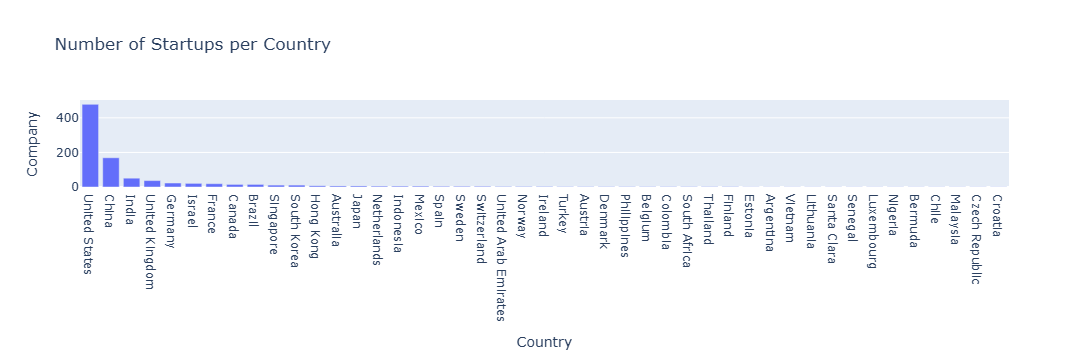

In [11]:
# Find the no of comapney in each counntry 


# Count the number of companies per country
country_counts = data["Country"].value_counts().reset_index()
country_counts.columns = ["Country", "Company"]

# Create a bar plot
fig = px.bar(country_counts, x="Country", y="Company", title="Number of Startups per Country")

# Show the plot
fig.show()


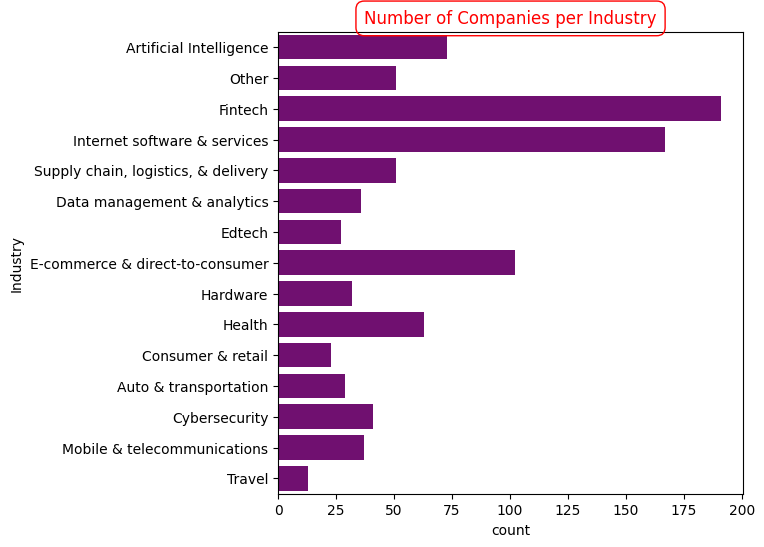

In [12]:
plt.figure(figsize=(6, 6))  # Set figure size

sns.countplot(y="Industry", data=data,color = 'Purple')  # Industry on Y-axis
plt.title("Industry", fontsize=16, fontweight="bold", color="red", bbox=dict(facecolor="none", edgecolor="red", boxstyle="round,pad=0.5"))
plt.title("Number of Companies per Industry")
plt.show()


In [41]:
# Now we will found the statistical data 

In [13]:
data.describe(include="all")


,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors,Year Joined,Month Joined
count,936.000000,936,936.000000,936,936,921,936,935,936.000000,936
unique,NaN,935,NaN,589,45,237,15,920,NaN,12
top,NaN,Bolt,NaN,7/13/2021,United States,San Francisco,Fintech,Undisclosed,NaN,July
freq,NaN,2,NaN,8,478,134,191,2,NaN,97
mean,467.500000,NaN,3.281154,NaN,NaN,NaN,NaN,NaN,2019.543803,NaN
std,270.344225,NaN,7.473179,NaN,NaN,NaN,NaN,NaN,2.020273,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN
25%,233.750000,NaN,1.050000,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN
50%,467.500000,NaN,1.600000,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN
75%,701.250000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,2021.000000,NaN


# Top 3 companey with maximum Company with different Industry

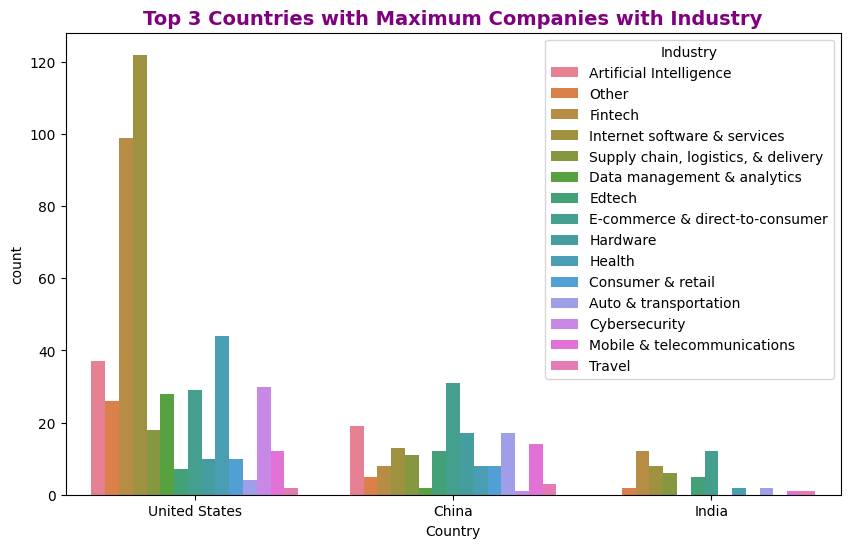

In [14]:
top_countries = data["Country"].value_counts().head(3).index
plt.figure(figsize=(10, 6))  # Set plot size
sns.countplot(x="Country",hue ="Industry" ,data=data, order=top_countries)  # Show only top 3 countries

plt.title("Top 3 Countries with Maximum Companies with Industry", fontsize=14, fontweight="bold", color="purple")
plt.show()

# Find the Year By Year Progression in Sartups

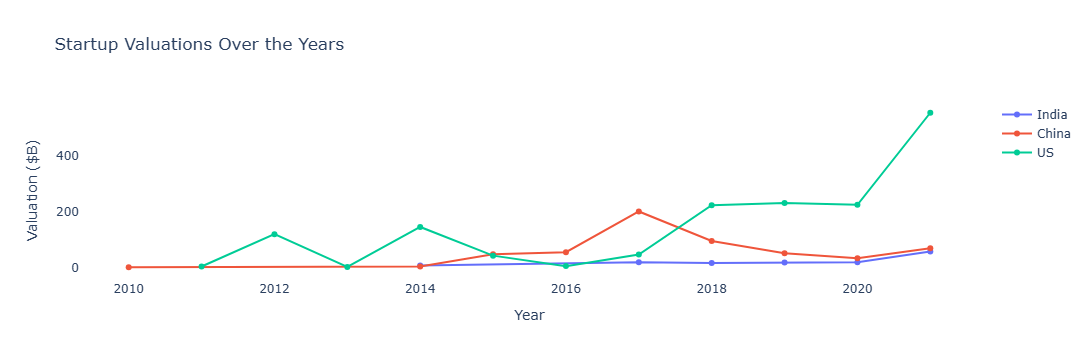

In [15]:

# Filter data for top 3 countries
df_us = data[data["Country"] == "United States"]
df_china = data[data["Country"] == "China"]
df_india = data[data["Country"] == "India"]


# Compute valuation per year
val_us = df_us.groupby("Year Joined")["Valuation ($B)"].sum().reset_index()
val_china = df_china.groupby("Year Joined")["Valuation ($B)"].sum().reset_index()
val_india = df_india.groupby("Year Joined")["Valuation ($B)"].sum().reset_index()

# Line plot using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=val_india["Year Joined"], y=val_india["Valuation ($B)"], mode="lines+markers", name="India"))
fig.add_trace(go.Scatter(x=val_china["Year Joined"], y=val_china["Valuation ($B)"], mode="lines+markers", name="China"))
fig.add_trace(go.Scatter(x=val_us["Year Joined"], y=val_us["Valuation ($B)"], mode="lines+markers", name="US"))
fig.update_layout(title="Startup Valuations Over the Years", xaxis_title="Year", yaxis_title="Valuation ($B)", plot_bgcolor="white")
fig.show()


In [33]:
df.head(1)

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."


# In which month was the most startup launched

In [17]:
# Count the number of startups launched each month
month_counts = df['Month'].value_counts()

print("Startups launched by month:")
print(month_counts)

# Find the month with the highest count
most_common_month = month_counts.idxmax()
print("\nThe month with the most startups launched is:", most_common_month)


Startups launched by month:
Month
July         97
October      96
September    90
June         90
November     87
April        87
May          82
March        80
August       64
January      63
December     59
February     41
Name: count, dtype: int64

The month with the most startups launched is: July


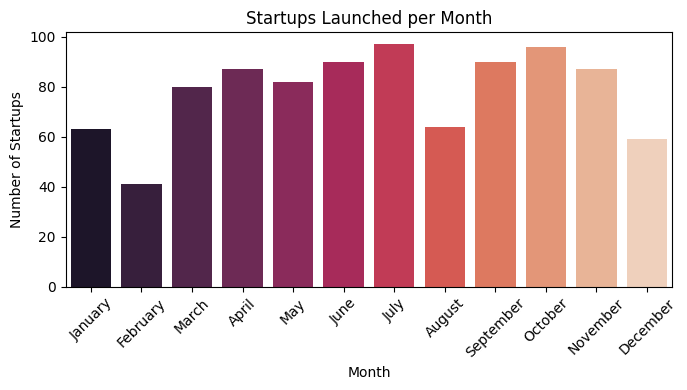

In [61]:

# Count startups per month, ordered in calendar sequence
order = ["January", "February", "March", "April", "May", "June", 
         "July", "August", "September", "October", "November", "December"]
counts = df['Month'].value_counts().reindex(order, fill_value=0)

# Create the bar chart with a single palette
plt.figure(figsize=(7, 4))
sns.barplot(x=counts.index, y=counts.values, palette="rocket",hue=counts.index)
plt.title("Startups Launched per Month")
plt.xlabel("Month")
plt.ylabel("Number of Startups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Find the Top and Least 5 Companey valuation

In [56]:
# These are the Top 5 Valution Companey


# Clean the valuation column (remove '$' and 'B', convert to float)
df['Valuation ($B)'] = df['Valuation ($B)'].str.replace("$", "").str.replace("B", "").astype(float)

# Find the top 5 companies based on valuation
top_5_companies = df.nlargest(5, 'Valuation ($B)')[['Company', 'Valuation ($B)']]

print(top_5_companies)



     Company  Valuation ($B)
0  Bytedance           140.0
1     SpaceX           100.3
2     Stripe            95.0
3     Klarna            45.6
4      Canva            40.0


In [58]:
# These are the least 5 Valutaion Comapaney



# Convert column to string before cleaning
df['Valuation ($B)'] = df['Valuation ($B)'].astype(str).str.replace(r"[$B]", "", regex=True).astype(float)

# Find the least 5 companies based on valuation
least_5_companies = df.nsmallest(5, 'Valuation ($B)')[['Company', 'Valuation ($B)']]

print(least_5_companies)



                     Company  Valuation ($B)
679                    Hailo             1.0
706                  Lookout             1.0
707                 Snapdeal             1.0
708  TechStyle Fashion Group             1.0
709                   InMobi             1.0


In [62]:
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors', 'Month'],
      dtype='object')

# Which investor invest most in the comapney 

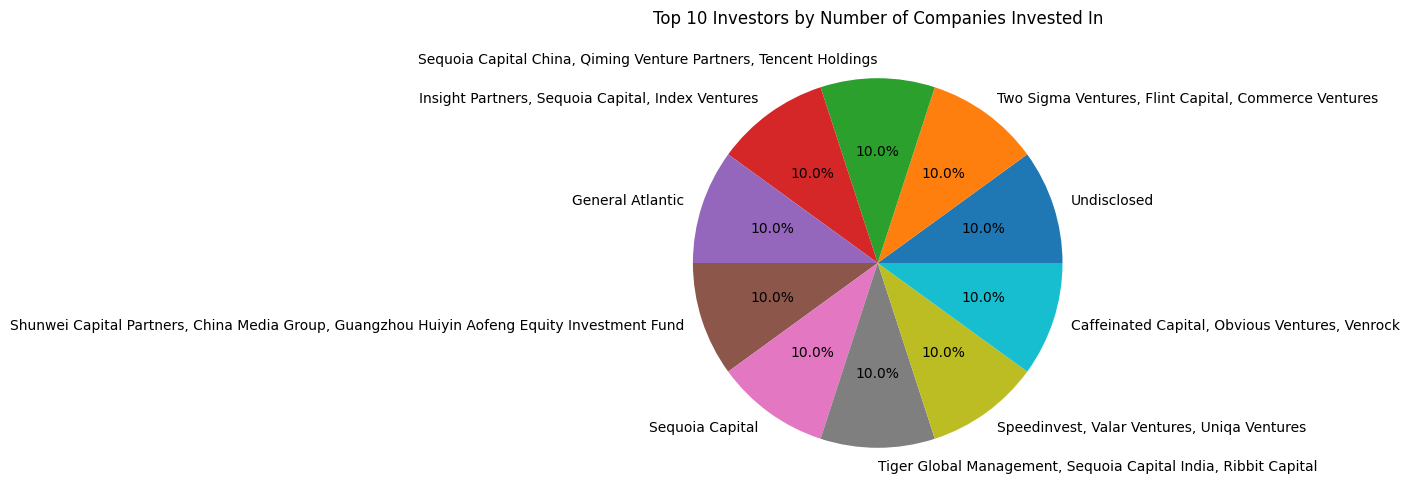

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Startups in 2021 end.csv")

# Count number of companies per investor
investor_counts = df['Select Investors'].value_counts().head(10)  # Top 5 investors

# Pie chart visualization
plt.figure(figsize=(8, 6))
plt.pie(investor_counts, labels=investor_counts.index, autopct='%1.1f%%')
plt.title("Top 10 Investors by Number of Companies Invested In")
plt.show()


# Which investor has the most share in the Bytedance and SpaceX

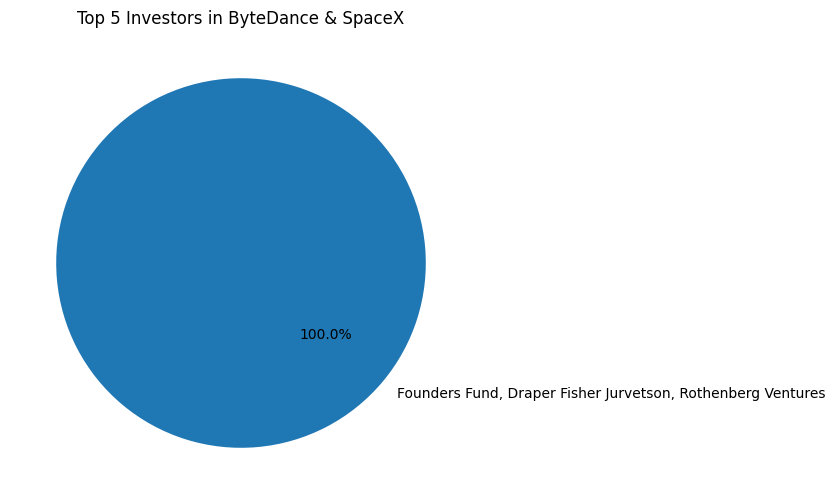

In [86]:

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Startups in 2021 end.csv")

# Filter data for ByteDance and SpaceX
companies = ["ByteDance", "SpaceX"]
filtered_df = df[df["Company"].isin(companies)]

# Count investments per investor
investor_counts = filtered_df["Select Investors"].value_counts()

# Plot donut chart
plt.figure(figsize=(8, 6))
plt.pie(investor_counts, labels=investor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Investors in ByteDance & SpaceX")
plt.show()


In [87]:
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

# Get the Top 5 cities which have the most startups 


In [92]:

city_counts = df["City"].value_counts().head(5)  # Top 4 cities

print(city_counts)


City
San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
Name: count, dtype: int64


# Top 5 companey with the most market Capitalization

In [94]:
import pandas as pd

# Load dataset
df = pd.read_csv("Startups in 2021 end.csv")

# Clean valuation column (remove '$' and convert to float)
df['Valuation ($B)'] = df['Valuation ($B)'].astype(str).str.replace(r"[^0-9.]", "", regex=True).astype(float)

# Group by city and country, summing market cap
city_market_cap = df.groupby(["City", "Country"])["Valuation ($B)"].sum().reset_index()

# Get the top 4 cities with the highest market capitalization
top_4_cities = city_market_cap.sort_values(by="Valuation ($B)", ascending=False).head(4)

print(top_4_cities)


              City         Country  Valuation ($B)
188  San Francisco   United States          602.12
13         Beijing           China          289.57
154       New York   United States          174.44
125         London  United Kingdom          126.38


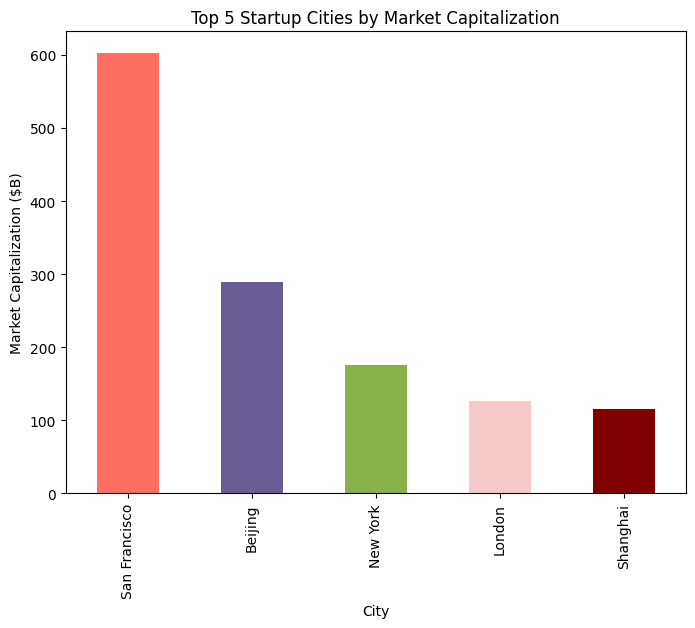

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Startups in 2021 end.csv")

# Clean valuation column (remove '$' and convert to float)
df['Valuation ($B)'] = df['Valuation ($B)'].astype(str).str.replace(r"[^0-9.]", "", regex=True).astype(float)

# Group by City, summing valuations
top_cities = df.groupby("City")["Valuation ($B)"].sum().nlargest(5)

# Plot a bar chart
top_cities.plot(kind="bar", color=["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9","maroon"], figsize=(8, 6))
plt.xlabel("City")
plt.ylabel("Market Capitalization ($B)")
plt.title("Top 5 Startup Cities by Market Capitalization")
plt.show()


# What is the percentage of Market Capture of  those companey

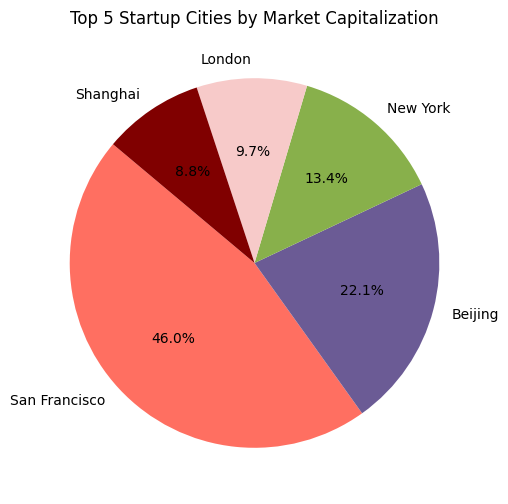

In [99]:

# Clean valuation column (remove '$' and convert to float)
df['Valuation ($B)'] = df['Valuation ($B)'].astype(str).str.replace(r"[^0-9.]", "", regex=True).astype(float)

# Group by City, summing valuations
top_cities = df.groupby("City")["Valuation ($B)"].sum().nlargest(5)

# Create a pie chart with percentage labels
plt.figure(figsize=(8, 6))
plt.pie(top_cities, labels=top_cities.index, autopct='%1.1f%%', startangle=140, colors=["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", "maroon"])
plt.title("Top 5 Startup Cities by Market Capitalization")
plt.show()
